<a href="https://colab.research.google.com/github/auramadera/auramadera/blob/main/AnalisisSupervisadoI_Sprint1%262.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analisís Supervisado I

Sprint 1_Aura Madera

In [22]:
#Importar librerias 

# libreria numerica
import numpy as np
# libreria pandas
import pandas as pd
# libreria para crear graficos 
import matplotlib.pyplot as plp
import plotly.express as xp

import seaborn as sns

In [7]:
# cargar fichero de datos
file = '/content/data/ASI_casoPractico.csv'
data = pd.read_csv(file, sep = ';')
data.head()

,ID,b,e,LBE,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,DP,DR,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,Target
0,1,240,357,120,0,0,0,73,0.5,43,2.4,0,0,0,0,64,62,126,2,0,120,137,121,73,1,1
1,2,5,632,132,4,0,4,17,2.1,0,10.4,2,0,0,0,130,68,198,6,1,141,136,140,12,0,0
2,3,177,779,133,2,0,5,16,2.1,0,13.4,2,0,0,0,130,68,198,5,1,141,135,138,13,0,0
3,4,411,1192,134,2,0,6,16,2.4,0,23.0,2,0,0,0,117,53,170,11,0,137,134,137,13,1,0
4,5,533,1147,132,4,0,5,16,2.4,0,19.9,0,0,0,0,117,53,170,9,0,137,136,138,11,1,0


In [8]:
# Información del conjunto de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        2126 non-null   int64  
 1   b         2126 non-null   int64  
 2   e         2126 non-null   int64  
 3   LBE       2126 non-null   int64  
 4   AC        2126 non-null   int64  
 5   FM        2126 non-null   int64  
 6   UC        2126 non-null   int64  
 7   ASTV      2126 non-null   int64  
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   int64  
 10  MLTV      2126 non-null   float64
 11  DL        2126 non-null   int64  
 12  DS        2126 non-null   int64  
 13  DP        2126 non-null   int64  
 14  DR        2126 non-null   int64  
 15  Width     2126 non-null   int64  
 16  Min       2126 non-null   int64  
 17  Max       2126 non-null   int64  
 18  Nmax      2126 non-null   int64  
 19  Nzeros    2126 non-null   int64  
 20  Mode      2126 non-null   int6

In [9]:
# numero de valores unicos para cada variable
data.agg(['nunique'])

,ID,b,e,LBE,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,DP,DR,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,Target
nunique,2126,979,1064,48,22,96,19,75,57,87,249,15,2,5,1,154,109,86,18,9,88,103,95,133,3,2


In [10]:
# eliminar columnas no necesarias
data = data.drop (["ID", "b", "e", "DR"], axis = 1)
data.head()

,LBE,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,DP,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,Target
0,120,0,0,0,73,0.5,43,2.4,0,0,0,64,62,126,2,0,120,137,121,73,1,1
1,132,4,0,4,17,2.1,0,10.4,2,0,0,130,68,198,6,1,141,136,140,12,0,0
2,133,2,0,5,16,2.1,0,13.4,2,0,0,130,68,198,5,1,141,135,138,13,0,0
3,134,2,0,6,16,2.4,0,23.0,2,0,0,117,53,170,11,0,137,134,137,13,1,0
4,132,4,0,5,16,2.4,0,19.9,0,0,0,117,53,170,9,0,137,136,138,11,1,0


Analisis Descriptivo

In [11]:
#valores nulos
data.isnull().sum()

LBE         0
AC          0
FM          0
UC          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
DL          0
DS          0
DP          0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
Target      0
dtype: int64

In [95]:
# ¿Cuál es la proporción de estados fetales normal? ¿y anormales?
a, b = data["Target"].value_counts()
print("Número de estados normales: " + str(a))
print("Número de estados anormales: " + str(b))

Número de estados normales: 1655
Número de estados anormales: 471


0    1655
1     471
Name: Target, dtype: int64


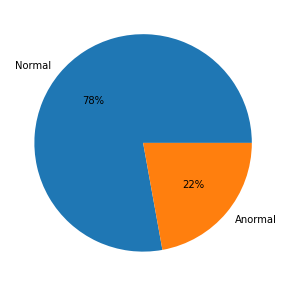

In [12]:
# Distribución de frecuencias del Target
a, b = data['Target'].value_counts()
plp.figure(figsize = (13,5))
plp.subplot(121)
plp.pie([a, b], labels=["Normal", "Anormal"], autopct="%1.0f%%")
print(data["Target"].value_counts())

In [96]:
# Obtenga las medidas de centralización, localización y dispersión para las variables:  
# FM, ALTV y Median.
data[["FM", "ALTV","Median"]].describe().T

,count,mean,std,min,25%,50%,75%,max
FM,2126.0,7.241298,37.125309,0.0,0.0,0.0,2.0,564.0
ALTV,2126.0,9.846660,18.396880,0.0,0.0,0.0,11.0,91.0
Median,2126.0,138.090310,14.466589,77.0,129.0,139.0,148.0,186.0


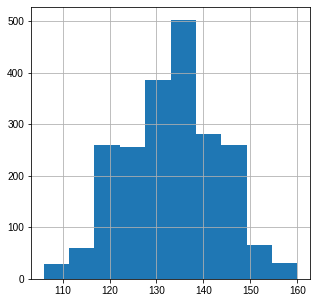

In [16]:
# Histograma LBE
fig, ax = plp.subplots(1,1,figsize=(5,5))
plp.style.use("seaborn")
data.LBE.hist(ax=ax);



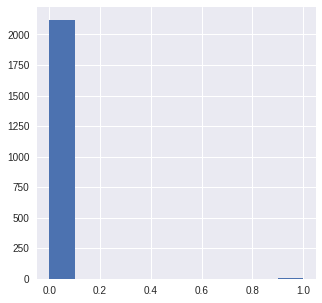

In [17]:
# Histograma DS
fig, ax = plp.subplots(1,1,figsize=(5,5))
plp.style.use("seaborn")
data.DS.hist(ax=ax);

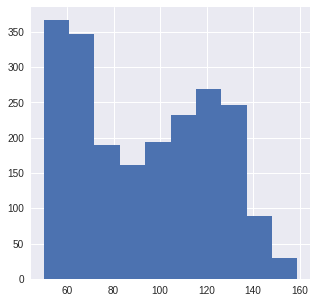

In [18]:
# Histograma Min
fig, ax = plp.subplots(1,1,figsize=(5,5))
plp.style.use("seaborn")
data.Min.hist(ax=ax);

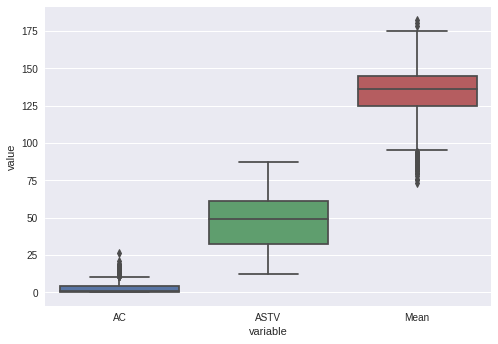

In [99]:
# Obtenga un gráfico box -plot para las variables: AC, ASTV y Mean. 
sns.boxplot(x="variable", y="value", data=pd.melt(data[["AC", "ASTV", "Mean"]]))

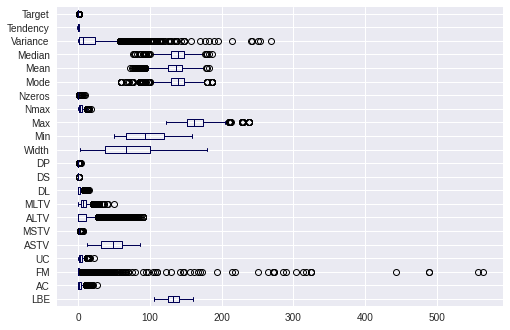

In [100]:
#box plot

data_box_plot = data.boxplot(vert=False, color = "#000054")

Sprint 2

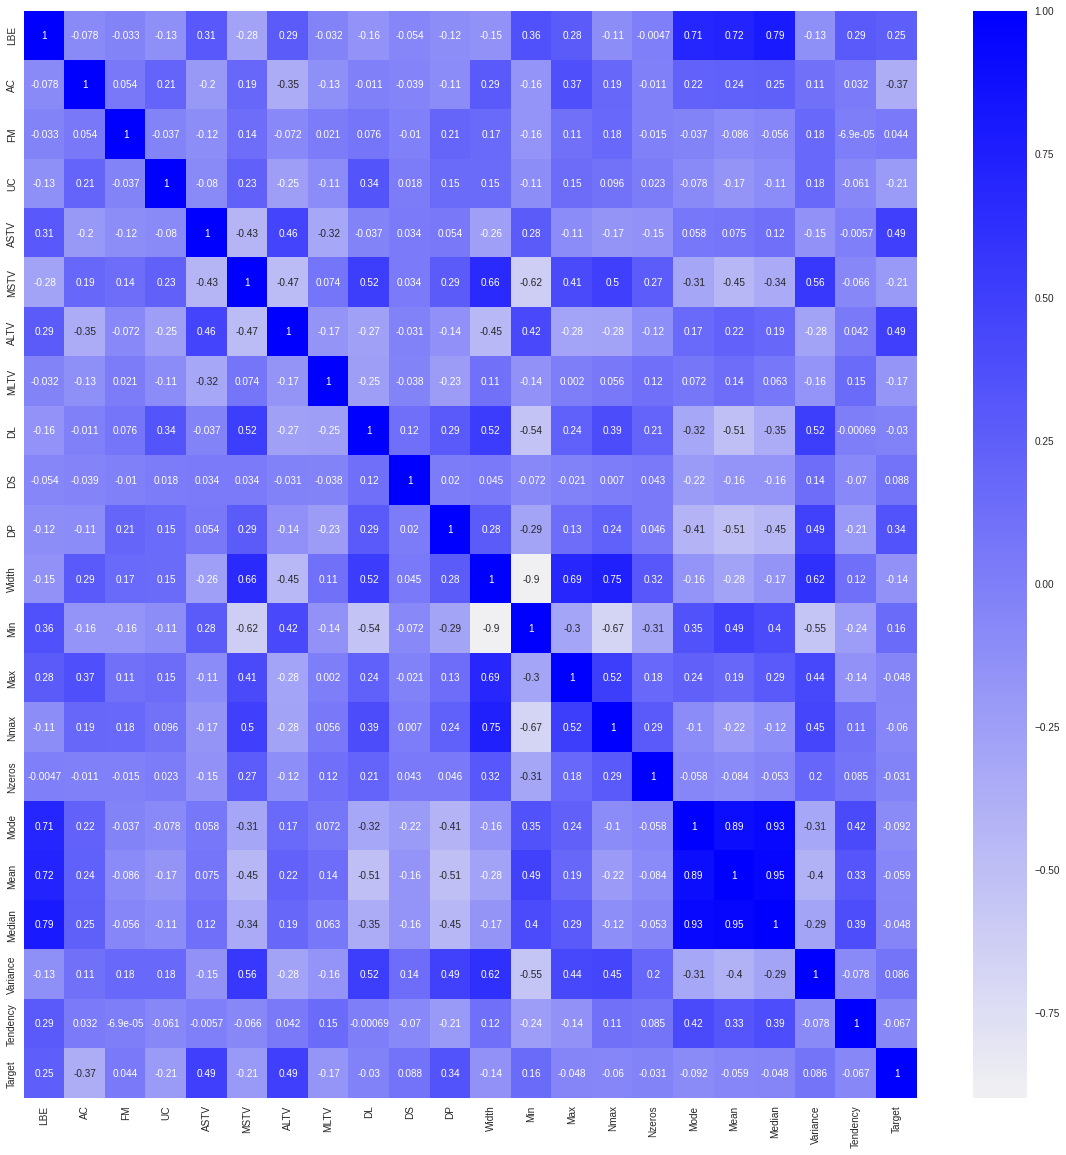

In [69]:
# Matriz de correlaciones
plp.figure(figsize=(20,20))
corr = data.corr()
cmap = sns.color_palette("light:b", as_cmap=True)
sns.heatmap(corr, annot=True, cmap=cmap)

Las 3 variables con mayor correlación:

1- LBE

2- ASTV

3- Width

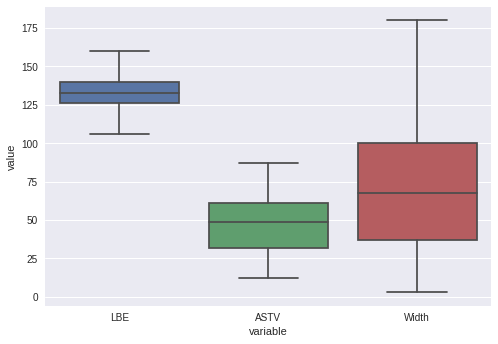

In [101]:
# Obtenga un gráfico box -plot para las variables: AC, ASTV y Mean. 
sns.boxplot(x="variable", y="value", data=pd.melt(data[["LBE", "ASTV", "Width"]]))

Text(0.5, 1.0, 'Baseline Fetal Heart Rate (FHR) for each status')

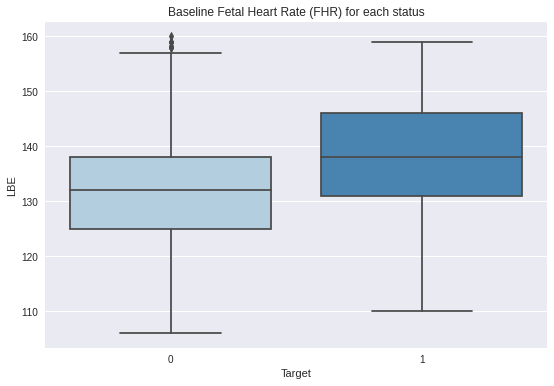

In [25]:
# Relación Univariante del target con las variables explicativas
plp.figure(figsize = (9,6))
sns.boxplot(x = 'Target', y= 'LBE', data= data, palette= "Blues")
plp.title('Baseline Fetal Heart Rate (FHR) for each status')

Text(0.5, 1.0, 'Baseline Fetal Heart Rate (FHR) for each status')

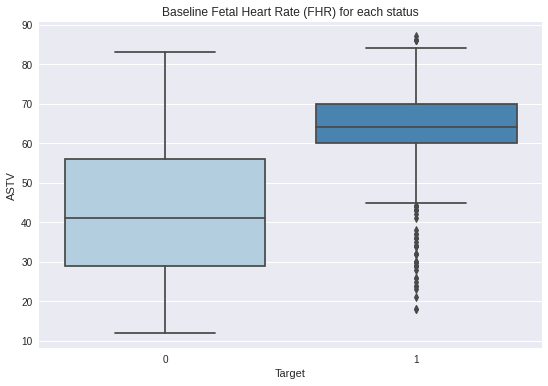

In [75]:
plp.figure(figsize = (9,6))
sns.boxplot(x = 'Target', y= 'ASTV', data= data, palette= "Blues")
plp.title('Baseline Fetal Heart Rate (FHR) for each status')

Text(0.5, 1.0, 'Baseline Fetal Heart Rate (FHR) for each status')

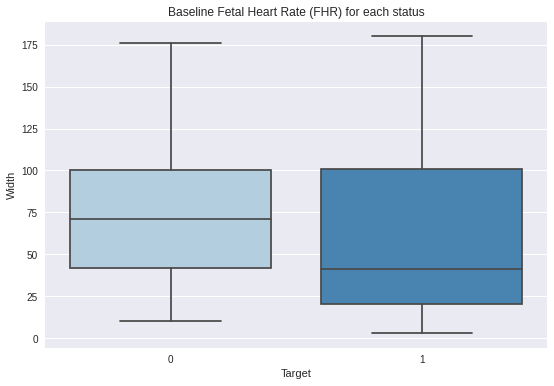

In [82]:
plp.figure(figsize = (9,6))
sns.boxplot(x = 'Target', y= 'Width', data= data, palette= "Blues")
plp.title('Baseline Fetal Heart Rate (FHR) for each status')

In [89]:
# Muestreo

#Entrenamiento y TEST
from sklearn.model_selection import train_test_split
x = data.loc[:, data.columns != "Target"]
y = data.loc[:, data.columns == "Target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=43)

x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1275 entries, 1657 to 1860
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LBE       1275 non-null   int64  
 1   AC        1275 non-null   int64  
 2   FM        1275 non-null   int64  
 3   UC        1275 non-null   int64  
 4   ASTV      1275 non-null   int64  
 5   MSTV      1275 non-null   float64
 6   ALTV      1275 non-null   int64  
 7   MLTV      1275 non-null   float64
 8   DL        1275 non-null   int64  
 9   DS        1275 non-null   int64  
 10  DP        1275 non-null   int64  
 11  Width     1275 non-null   int64  
 12  Min       1275 non-null   int64  
 13  Max       1275 non-null   int64  
 14  Nmax      1275 non-null   int64  
 15  Nzeros    1275 non-null   int64  
 16  Mode      1275 non-null   int64  
 17  Mean      1275 non-null   int64  
 18  Median    1275 non-null   int64  
 19  Variance  1275 non-null   int64  
 20  Tendency  1275 non-null   i

In [90]:
print(x)

      LBE  AC  FM  UC  ASTV  ...  Mode  Mean  Median  Variance  Tendency
0     120   0   0   0    73  ...   120   137     121        73         1
1     132   4   0   4    17  ...   141   136     140        12         0
2     133   2   0   5    16  ...   141   135     138        13         0
3     134   2   0   6    16  ...   137   134     137        13         1
4     132   4   0   5    16  ...   137   136     138        11         1
...   ...  ..  ..  ..   ...  ...   ...   ...     ...       ...       ...
2121  140   0   0   6    79  ...   153   150     152         2         0
2122  140   1   0   9    78  ...   152   148     151         3         1
2123  140   1   0   7    79  ...   153   148     152         4         1
2124  140   1   0   9    78  ...   152   147     151         4         1
2125  142   1   1   5    74  ...   145   143     145         1         0

[2126 rows x 21 columns]


In [91]:
print(y)

      Target
0          1
1          0
2          0
3          0
4          0
...      ...
2121       1
2122       1
2123       1
2124       1
2125       0

[2126 rows x 1 columns]


Entrenamiento

In [92]:
# Modelización
from sklearn.naive_bayes import  GaussianNB
gnb = GaussianNB()

modelNB = gnb.fit(x_train, y_train.values.ravel())
y_pred_train = modelNB.predict_proba(x_train)
y_pred_test = modelNB.predict_proba(x_test)


#presentamos nuestros resultados
print('y_pred_train= ' + str (y_pred_train))
print('y_pred_test = ' + str (y_pred_test))

y_pred_train= [[9.35996959e-001 6.40030406e-002]
 [9.99993521e-001 6.47860799e-006]
 [5.99101897e-007 9.99999401e-001]
 ...
 [2.38022773e-002 9.76197723e-001]
 [4.63065948e-001 5.36934052e-001]
 [1.00000000e+000 1.59774191e-139]]
y_pred_test = [[7.19505299e-001 2.80494701e-001]
 [9.99651826e-001 3.48174085e-004]
 [1.00000000e+000 1.09986216e-158]
 ...
 [9.43482668e-001 5.65173320e-002]
 [8.07603327e-002 9.19239667e-001]
 [4.13041140e-029 1.00000000e+000]]


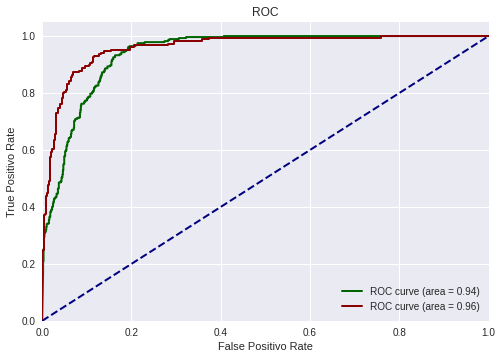

In [102]:
# Validación
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

# Curva Roc y Auc para trainig
fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_train[:, 1])
roc_auc_train = auc(fpr_train, tpr_train)

# Curva Roc y Auc para test
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_test[:, 1])
roc_auc_test = auc(fpr_test, tpr_test)

#Gráfica
plp.figure()
lw = 2

plp.plot(fpr_train,tpr_train,color="darkgreen",lw=lw, label="ROC curve (area = %0.2f)" % roc_auc_train)
plp.plot(fpr_test,tpr_test, color="darkred",lw=lw, label="ROC curve (area = %0.2f)" % roc_auc_test)

plp.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plp.xlim([0.0, 1.0])
plp.ylim([0.0, 1.05])
plp.xlabel("False Positivo Rate")
plp.ylabel("True Positivo Rate")
plp.title("ROC")
plp.legend(loc="lower right")
plp.show()

